# Regresi Logistik

Dalam praktikum ini kita akan menggunakan regresi linear yang sudah dipelajari untuk kasus klasifikasi, dengan cara melakukan suatu transformasi sederhana pada model regresi linearnya. Kita akan menggunakan contoh berupa peluang *credit card default* yang diambil dari [ISLR](https://rdrr.io/cran/ISLR/man/Default.html).

In [1]:
# Memanggil semua pustaka yang diperlukan
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Tugas 1 : Membaca data dari file csv (15 points)
1. Baca data dari file default.csv menggunakan pandas
2. Ganti semua label 'No' dengan 0 dan label 'Yes' dengan 1<p>
   Referensi: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html
3. Simpan hasil pembacaan ke variable `default`
4. Tampilkan 10 data pertama

In [2]:
# Kode Anda di bawah ini




Karena variabel dependen (yaitu feature `default`) dalam klasifikasi hanya bernilai 0 atau 1, menggunakan model regresi linear secara langsung berakibat pada luaran yang tidak dibatasi. Sehingga, nilainya bisa kurang dari 0 atau lebih dari 1. Di bawah ini adalah contoh ketika nilai probabilitas *default*-nya kurang dari 0 - padahal kita tahu bahwa probabilitas itu nilainya selalu antara 0 dan 1. Fungsi logistik atau sigmoid membantu memaksa luarannya dari $(-\infty, \infty)$ menjadi $[0, 1]$.

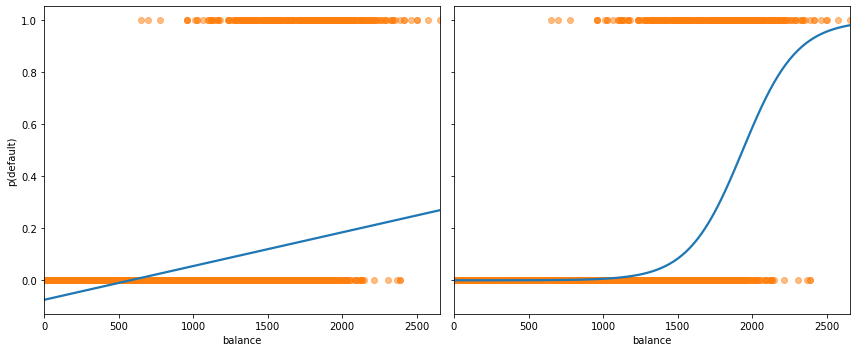

In [4]:
fig, ax = plt.subplots(ncols=2, sharey=True, figsize=(12, 5))
# ols (ordinary least squares)
sns.regplot(
    x='balance',
    y='default',
    ci=None,
    data=default,
    scatter_kws=dict(
        color='tab:orange',
        alpha=0.5
    ),
    ax=ax[0]
)
# regresi logistik
sns.regplot(
    x='balance',
    y='default',
    logistic=True, # perhatikan baris ini untuk membuat grafiknya dalam bentuk logistic
    ci=None,
    data=default,
    scatter_kws=dict(
        color='tab:orange',
        alpha=0.5
    ),
    ax=ax[1]
)
plt.xlabel('balance')
ax[0].set_ylabel('p(default)')
ax[1].set_ylabel('')
plt.tight_layout();

## Tugas 2 : Berdasarkan nama-nama kolom dan plot yang sudah terlihat di atas, jawab pertanyaan berikut ini: (10 points)
1. Apa saja nama fitur dari dataset tersebut (selain output)? <p>
Jawab:
<p>

2. Apa nama fitur yang dijadikan label/output dari dataset tersebut ?<p>
Jawab:

Odds atau logit adalah invers dari fungsi logistik. Hubungan antara log-odds sebagai luaran dari logit dan probabilitas sebagai luaran dari fungsi logistik dapat dilihat di bawah ini.

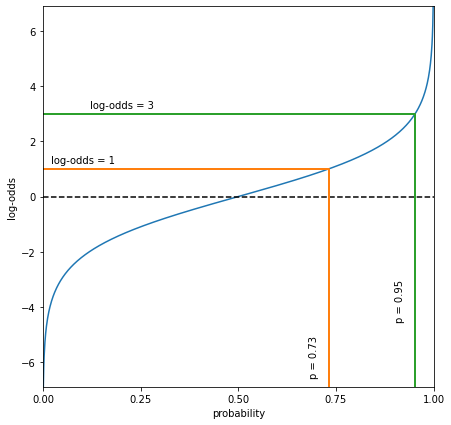

In [6]:
from scipy.special import expit, logit

xfit = np.linspace(0, 1, 1000)
yfit = logit(xfit)

fig, ax = plt.subplots(figsize=(7, 7))
ax.margins(0)
plt.plot(xfit, yfit)
plt.axhline(0, c='k', linestyle='--')
plt.plot([0, expit(1), expit(1)], [1, 1, yfit[1]], lw=2)
plt.plot([0, expit(3), expit(3)], [3, 3, yfit[1]], lw=2)
ax.text(0.02, 1.2, 'log-odds = 1')
ax.text(0.12, 3.2, 'log-odds = 3')
ax.text(expit(1) - 0.05, -6.5, 'p = 0.73', rotation=90)
ax.text(expit(3) - 0.05, -4.5, 'p = 0.95', rotation=90)
plt.xticks(np.arange(0, 1.1, 0.25))
plt.xlabel('probability')
plt.ylabel('log-odds');

Pada akhirnya, parameter yang dipelajari dari regresi logistik akan membentuk vektor yang tegak lurus dengan batas keputusan saat $P(y=1) = 0.5$.

Text(0, 0.5, 'bill depth')

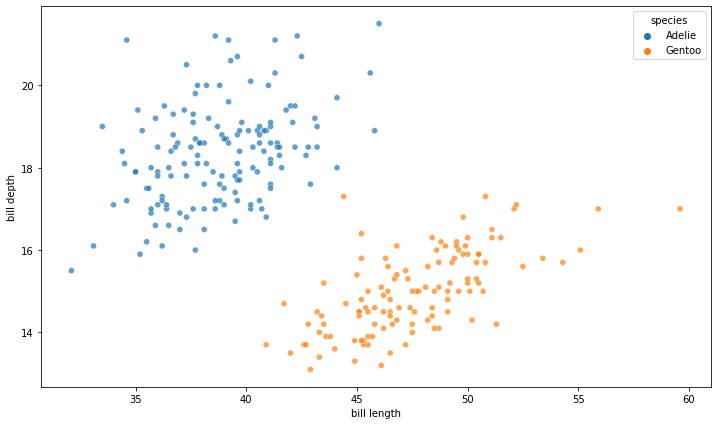

In [7]:
# Menggunakan data penguins
df = sns.load_dataset('penguins').dropna().query('species != "Chinstrap"')

# Plot data penguins
fig, ax = plt.subplots(figsize=(12, 7))
sns.scatterplot(
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species',
    data=df,
    alpha=0.7
)
plt.xlabel('bill length')
plt.ylabel('bill depth')

## Tugas 3 : Menggunakan model logistic regression dari sklearn (20 points)
1. Gunakan feature `bill_length_mm` dan `bill_depth_mm` dari data penguins di atas sebagai features, simpan dalam variabel `X`
2. Gunakan feature `species` dari data penguins di atas sebagai output label, simpan dalam variabel `y`
3. Deklarasikan model LogisticRegression dalam variabel `mdl` (lihat contoh praktikum sebelumnya),<br>
   atau referensi: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
4. Lakukan fitting terhadap variabel `X` dan `y`

In [8]:
# Membuat model Logistic Regression dengan sklearn
from sklearn.linear_model import LogisticRegression

# Kode Anda di bawah ini




## Jangan hapus kode di bawah ini. Setelah kode anda selesai, uncomment code di bawah ini
# fig, ax = plt.subplots(figsize=(12, 7))
# sns.scatterplot(
#     x='bill_length_mm',
#     y='bill_depth_mm',
#     hue='species',
#     data=df,
#     alpha=0.7
# )
# plt.xlabel('bill length')
# plt.ylabel('bill depth')

# #  Mengambil parameter dari model
# b = mdl.intercept_[0]
# w1, w2 = mdl.coef_.T
# # Hitung intercept dan slope atau gradient dari decision boundary.
# c = -b/w2
# m = -w1/w2

# # Plot data dan klasifikasi dengan decision boundary-nya
# xmin, xmax = 30, 60
# ymin, ymax = 10, 27
# xd = np.array([xmin, xmax])
# yd = m*xd + c
# plt.plot(xd, yd, 'k', lw=1, ls='--')
# o = 39
# origin = (o, c + o * m)
# dest = (o + w1, c + o * m + w2)
# plt.annotate('$\\vec{w}$', xytext=dest, xy=origin, arrowprops=dict(arrowstyle='<-'));

## Tugas 4 : Menggunakan model SGDClassifier dari sklearn (20 points)
Library SGDClassifier mengimplementasikan logistik regression dengan optimisasinya menggunakan stochastic gradient descent. Lakukan hal yang sama dengan Tugas 3 di atas, namun kali ini gunakan library SGDClassifier

In [10]:
# Membuat model Logistic Regression dengan sklearn
from sklearn.linear_model import SGDClassifier

# Kode Anda di bawah ini




## Jangan hapus kode di bawah ini. Setelah kode anda selesai, uncomment code di bawah ini
# fig, ax = plt.subplots(figsize=(12, 7))
# sns.scatterplot(
#     x='bill_length_mm',
#     y='bill_depth_mm',
#     hue='species',
#     data=df,
#     alpha=0.7
# )
# plt.xlabel('bill length')
# plt.ylabel('bill depth')

# #  Mengambil parameter dari model
# b = mdl.intercept_[0]
# w1, w2 = mdl.coef_.T
# # Hitung intercept dan slope atau gradient dari decision boundary.
# c = -b/w2
# m = -w1/w2

# # Plot data dan klasifikasi dengan decision boundary-nya
# xmin, xmax = 30, 60
# ymin, ymax = 10, 27
# xd = np.array([xmin, xmax])
# yd = m*xd + c
# plt.plot(xd, yd, 'k', lw=1, ls='--')

## Mencari Gradien

Sesi ini bertujuan untuk membantu Anda dalam pemahaman metode optimasi numerik dengan menggunakan gradient descent. Contoh kasus yang diberikan adalah dengan fungsi kuadrat yang bersifat konveks, i.e. punya satu titik optimum yaitu nilai terkecil.

Jika diberikan fungsi $E(w) = w^2$, maka nilainya akan optimum saat turunan pertama, i.e.

$$
\frac{dE(w)}{dw} = 0
$$

dengan fungsi di turunan pertama adalah

$$
\frac{dE(w)}{dw} = 2w
$$

Dengan demikian, nilai $w$ akan diperbaiki secara iteratif mengikuti

$$
w \leftarrow w - \eta \frac{dE(w)}{dw}
$$

atau

$$
w \leftarrow w - \eta 2w
$$

dengan $\eta$ adalah *learning rate* yang umumnya bernilai $[0, 1]$.

## Hampiran Turunan dengan Limit

Ingat bahwa gradien di suatu titik $a$ dapat dilihat sebagai limit sedemikian sehingga

$$
E^{\prime}(a) = \lim_{h \rightarrow 0} \frac{E(a+h)-E(a)}{h}
$$

dan garis singgungnya akan memenuhi persamaan

$$
y = E(a) + E^{\prime}(a)(x-a)
$$

In [12]:
# Definisikan fungsi error :
def error(w):
    return w**2

w = np.linspace(-5,5,100) # definisi nilai w yang mungkin
y = error(w) # E(w)

In [13]:
a = 4
h = 1e-5

x = np.array([2.5,3,5.5])
oprime = (error(a+h) - error(a)) / h
tan = error(a) + oprime * (x-a)

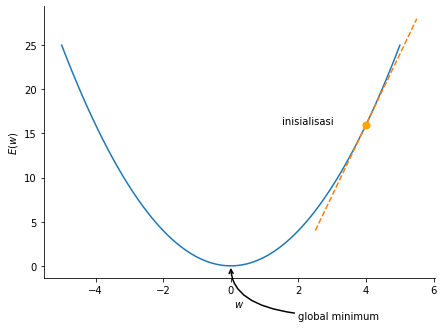

In [14]:
fig, ax = plt.subplots(figsize=(7,5))

ax.plot(w, y, zorder=1)
ax.scatter([a], [error(a)], c='orange', s=50, zorder=2) # titik awal
ax.plot(x, tan, linestyle='--', zorder=1) # gradien
ax.annotate('inisialisasi', (1.5, error(4)))
ax.annotate('global minimum', xy=(0, 0), xytext=(2, -6),
            arrowprops=dict(arrowstyle="->", linewidth=1.5,
                            connectionstyle="angle3,angleA=0,angleB=-90"));

ax.set_ylabel('$E(w)$')
ax.set_xlabel('$w$')
sns.despine()

Masih dengan kasus yang sama, fungsi error $E(w) = w^2$ dan gradiennya didefinisikan denga code di bawah ini

In [15]:
def f(x):
    return x**2

def grad(x):
    return 2*x

## Tugas 5 : Buat code gradient descent (25 points)
Buatlah fungsi gradient descent di bawah ini dengan memanfaatkan fungsi perhitungan error dan gradient di atas

In [16]:
def gradient_descent(w0, a=0.01, n=100):
    '''
        w0 adalah nilai inisialisasi dari w
        a  adalah besar learning rate nya
        n  adalah banyaknya iterasi
    '''
    w = w0     # inisialisasi w
    ew = f(w)  # mengevaluasi error

    ws = [w]   # inisialisasi list untuk menyimpan semua nilai w
    ews = [ew] # inisialisasi list untuk menyimpan semua nilai error
    
    # kode Anda dibawah sini
    
    
    
    
    return ws, ews

Dari fungsi gradient_descent yang sudah dibuat di atas, kita bisa gambarkan tiap tahapannya di bawah ini. 

## Tugas 6 : Plot gradient descent (10 points)
Kita akan membandingkan 2 nilai learning rate yang berbeda. Lanjutkan code di bawah ini untuk kasus nilai learning rate = 0.9<br>
Referensi: https://www.python-course.eu/matplotlib_subplots.php

Text(0, 0.5, '$E(w)$')

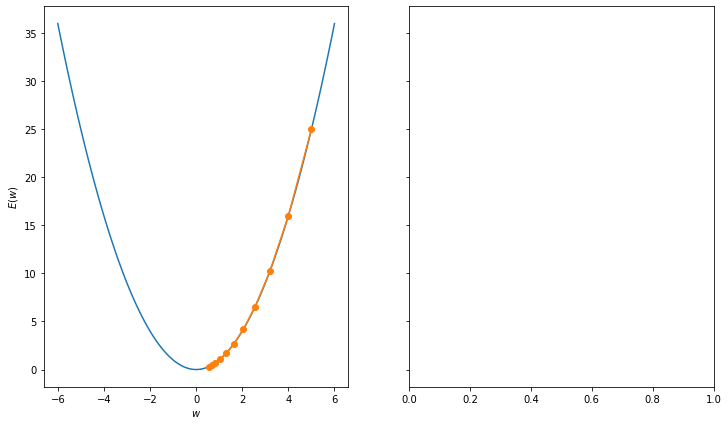

In [18]:
support = np.linspace(-6,6,100)

w0 = 5
fig, ax = plt.subplots(ncols = 2, figsize=(12,7), sharey=True)
ax[0].plot(support, f(support))
ax[0].plot(
    *gradient_descent(w0, a = 0.1, n = 10),
    marker='o'
)
    
ax[0].set_xlabel('$w$')
ax[0].set_ylabel('$E(w)$')

# Kode Anda di bawah ini




## Gradient Descent dalam Dimensi Tinggi

Tujuan kita dalam melakukan *gradient descent* adalah mencapai nilai global minimum dari titik inisialisasi yang ditentukan secara acak. Untuk lebih dari satu dimensi $w$, gradiennya bisa dihitung dengan turunan parsial sehingga nilai $w$ yang baru untuk dimensi ke-$d$ adalah

$$
w_d \leftarrow w_d - \eta \frac{\partial E(\mathbf{w})}{\partial w_d}
$$

atau terkadang ditulis sebagai

$$
\mathbf{w} \leftarrow \mathbf{w} - \eta \nabla_{\mathbf{w}} E(\mathbf{w})
$$

Jika diberikan fungsi error $E(\mathbf{w}) = w_1^2 + w_2^2$, maka

$$
w_1 \leftarrow w_1 - \eta \frac{\partial E(\mathbf{w})}{\partial w_1}
$$

atau

$$
w_1 \leftarrow w_1 - \eta 2w_1
$$

Demikian pula halnya dengan $w_2$.

In [20]:
eta = 0.05 # learning rate
w1 = -6 # inisialisasi
w2 = 6 # inisialisasi

def sgd(w, epoch=50):
    w_all = [w]

    for i in range(epoch):
        w = w - eta * 2*w
        w_all.append(w)

    return np.array(w_all) # menghasilkan setiap titik perubahan w

In [21]:
w1_all = sgd(w1)
w2_all = sgd(w2)

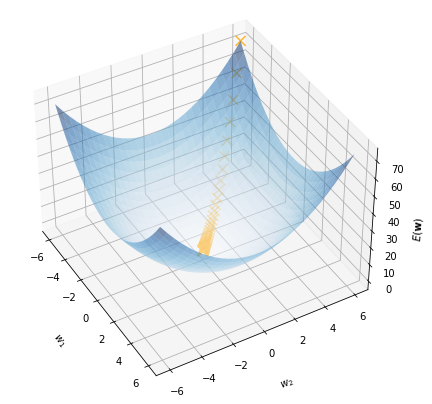

In [22]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')
ax.view_init(40, -30)

def f(x, y): # fungsi error
    return x**2 + y**2

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

ew = f(w1_all, w2_all)
ax.scatter3D(w1_all, w2_all, ew, s=100, marker='x', color='orange');

ax.plot_surface(X, Y, Z, cmap='Blues', alpha=0.5)
ax.set_xlabel('$w_1$', labelpad=15)
ax.set_ylabel('$w_2$', labelpad=15)
ax.set_zlabel('$E(\mathbf{w})$', labelpad=5);

Tanda silang berwarna jingga di atas adalah perubahan nilai $E(\mathbf{w})$ untuk setiap perubahan nilai $w_1$ dan $w_2$ dengan metode *gradient descent*. Apa yang terjadi jika nilai $\eta$ kita perbesar? Apa pula yang terjadi jika nilai $\eta$ diperkecil? Seperti apa pengaruh jumlah epoch pada titik akhir yang dicapai?